# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.preprocessing import sequence
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
tf.random.set_seed(1)

# Importing Dataset

#### top_words = 30000 means that we have 30k words in the dictionary.
#### sequence_length = 1000 is the lenght of the sentence

In [ ]:
top_words = 30000
sequence_length = 1000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_train)

(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194

### adding padding to make all the sentences with the same length

In [ ]:
x_train = sequence.pad_sequences(x_train,maxlen=sequence_length)
x_test = sequence.pad_sequences(x_test,maxlen=sequence_length)
print(x_train)

[[    0     0     0 ...    19   178    32]
 [    0     0     0 ...    16   145    95]
 [    0     0     0 ...     7   129   113]
 ...
 [    0     0     0 ...     4  3586 22459]
 [    0     0     0 ...    12     9    23]
 [    0     0     0 ...   204   131     9]]


#### we have 25k sentence and each one is 1000 length 

In [ ]:
print(x_train.shape)

(25000, 1000)


## Splitting Data to train and validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 0)

## Defining the model and hyper parameters

In [ ]:
model = keras.models.Sequential()

model.add(tf.keras.layers.Embedding(top_words, 60, input_length=sequence_length))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides= 1,padding='same', activation= 'relu'))
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides= 1,padding='same', activation= 'relu'))

model.add(tf.keras.layers.GlobalMaxPool1D())


model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))


model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



opt=tf.keras.optimizers.Adam(
    learning_rate=0.001
)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history=model.fit(x_train, y_train,epochs=10,validation_batch_size=128,validation_data=(x_val, y_val),callbacks=[early_stopping])


Epoch 1/10
625/625 [==============================] - 18s 8ms/step - loss: 0.5156 - accuracy: 0.7179 - val_loss: 0.3190 - val_accuracy: 0.8646
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2695 - accuracy: 0.8943 - val_loss: 0.2693 - val_accuracy: 0.8874
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.1519 - accuracy: 0.9459 - val_loss: 0.2845 - val_accuracy: 0.8910
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0809 - accuracy: 0.9736 - val_loss: 0.3601 - val_accuracy: 0.8876
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.4362 - val_accuracy: 0.8860
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.5560 - val_accuracy: 0.8822


# Evaluation 

### Accuracy 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

782/782 [==============================] - 3s 3ms/step - loss: 0.2956 - accuracy: 0.8860
Loss = 0.296
Accuracy = 88.6 %


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred >.5)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy: "+ str(accuracy_score(y_test, y_pred)*100))

accuracy: 88.6


### Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
array=confusion_matrix(y_test, y_pred)
array

array([[11124,  1376],
       [ 1474, 11026]])

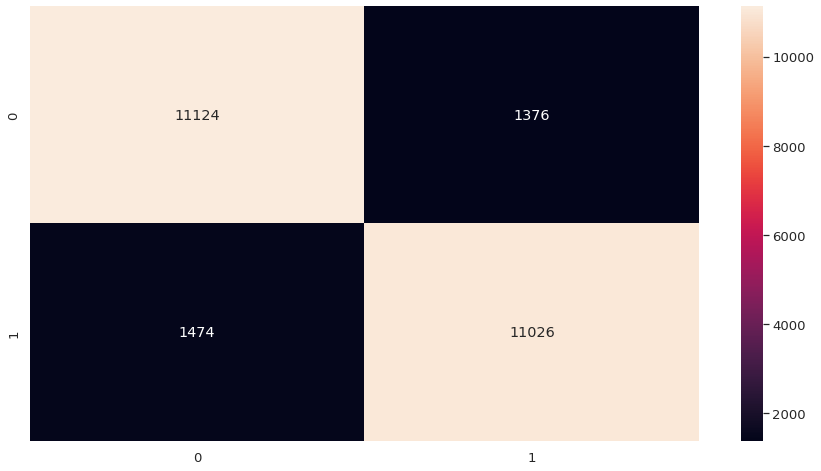

In [ ]:
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.2) # for label size
plt.figure(figsize=(15,8))
sn.heatmap(df_cm, annot=True, fmt="d") # font size
plt.show()

# Drawing the Accuracy and Loss  Line Chart

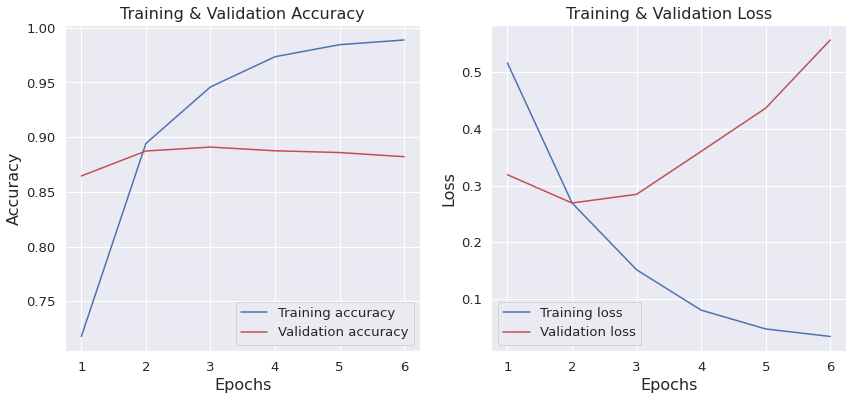

In [ ]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy',color='r')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss',color='r')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()